In [26]:
!pip install azure-ai-formrecognizer


In [27]:
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
import requests
from io import BytesIO
from PIL import Image
from IPython.display import display

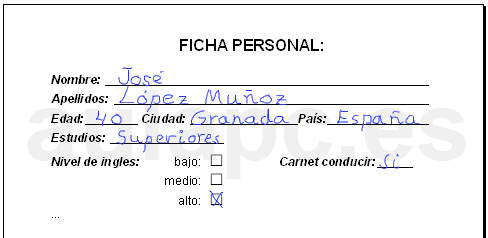


📄 Página número: 1
--------------------------------------------------
📌 Línea: FICHA PERSONAL:
📌 Línea: Nombre:
📌 Línea: José
📌 Línea: Apellidos:
📌 Línea: López Muñoz
📌 Línea: Edad:
📌 Línea: 40 Ciudad: Granada País: España
📌 Línea: Estudios:
📌 Línea: Superiores
📌 Línea: Nivel de ingles:
📌 Línea: bajo:
📌 Línea: Carnet conducir: Si
📌 Línea: medio:
📌 Línea: alto:
--------------------------------------------------
☑️  Marca de selección: Estado = unselected
☑️  Marca de selección: Estado = unselected
☑️  Marca de selección: Estado = selected



In [28]:

class MicrosoftDataGetter:
    def __init__(self, api_key: str, endpoint: str):
        self.client = DocumentAnalysisClient(
            endpoint=endpoint,
            credential=AzureKeyCredential(api_key)
        )

    def ask_data(self, document_url: str, show_image: bool = True):
        #show the image
        if show_image:
            response = requests.get(document_url)
            img = Image.open(BytesIO(response.content))

            try:

                display(img)
            except NameError:
                img.show()

        # Analizyng document
        poller = self.client.begin_analyze_document_from_url(
            "prebuilt-document", document_url
        )
        result = poller.result()

        # print the result
        for page in result.pages:
            print("\n" + "=" * 50)
            print(f"\033[1;36m📄 Página número: {page.page_number}\033[0m")
            print("-" * 50)
            for line in page.lines:
                print(f"\033[1;32m📌 Línea:\033[0m {line.content}")
            if page.selection_marks:
                print("-" * 50)
                for mark in page.selection_marks:
                    print(f"\033[1;33m☑️  Marca de selección:\033[0m Estado = {mark.state}")
            print("=" * 50 + "\n")

# defining needed variables
api_key   = "8a718cb7921840cabbafe134e1052390"
endpoint  = "https://ouspeedupapps.cognitiveservices.azure.com/"
img_url   = "https://www.aulapc.es/paginas/ofimatica/paginas/word/formularios/imagenes/formucon.png"

extractor = MicrosoftDataGetter(api_key, endpoint)
extractor.ask_data(img_url, show_image=True)
